# Predicting Heart Disease
The World Health Organization estimates that 17.9 million people die from cardiovascular diseases every year. 
These patients could have multiple risk factors that can contribute to heart disease: diet, lack of physical activity, mental illness. Identifying these could help prevent many premature deaths. 

The dataset given to accurately predict the likelihood of a new patient having heart disease in the future has the following features:
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal] (Target Variable)


In [227]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [228]:
data = pd.read_csv('heart_disease_prediction.csv')
#Read in file

In [229]:
data.head() #Getting a clear view of the data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [230]:
data.shape

(918, 12)

There are 918 instances and 12 rows, 11 being possible key features.

## Identifying column data types
From a brief overview, we see that data is both categorical and numerical in our dataset. 

We will run .dtypes to identify, but be sure to notice that FastingBS and HeartDisease are int64, but binary so therefore categorical.

In [231]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

**Numerical**
- Age
- RestingBP
- Cholesterol
- MaxHR
- OldPeak

**Categorical**
- Sex
- ChestPainType
- FastingBS
- RestingECG
- ExerciseAngina
- ST_Slope
- HeartDisease

In [232]:
data.describe() #Descriptive Statistics

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


The Age column hovers around 53 with a low standard deviation. RestingBP and MaxHR both have a bit high of standard deviations, while cholesterol is highly
variable. 

#### **Odd Things**

RestingBP and Cholesterol have a minimum value of zero, which doesn't make physiological sense. Cholesterol also has a high standard deviation, but the quartiles seem to be concentrated and a median +25, maybe it's skewed?

In [233]:
null_data = pd.DataFrame(data.isnull().value_counts())
null_data #There's no null values

,,,,,,,,,,,,0
Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,
False,False,False,False,False,False,False,False,False,False,False,False,918


### Generating Plots for Categorical Columns
- Sex
- ChestPainType
- FastingBS
- RestingECG
- ExerciseAngina
- ST_Slope
- HeartDisease

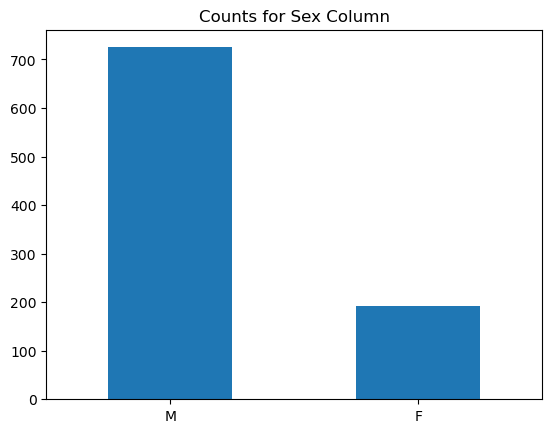

In [234]:
import matplotlib.pyplot as plt

data['Sex'].value_counts().plot(kind = 'bar')
plt.title('Counts for Sex Column')
plt.xticks(rotation = 0)
plt.show()

Mostly male patients, which makes sense heart disease is routinely found in men.

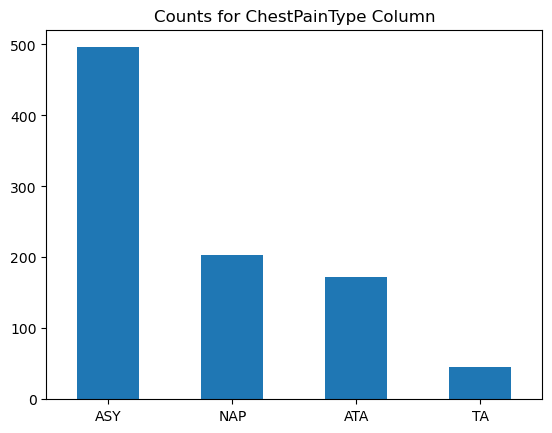

In [235]:
data['ChestPainType'].value_counts().plot(kind = 'bar')
plt.title('Counts for ChestPainType Column')
plt.xticks(rotation = 0)
plt.show()

Majority of chest pain is ASY.

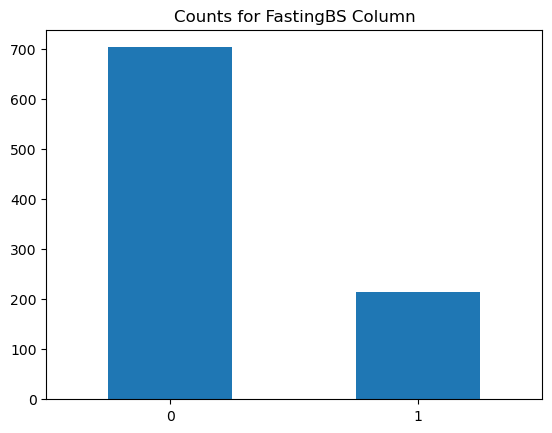

In [236]:
data['FastingBS'].value_counts().plot(kind = 'bar')
plt.title('Counts for FastingBS Column')
plt.xticks(rotation = 0)
plt.show()

Fasting Blood Sugar on the lower side surprisingly.

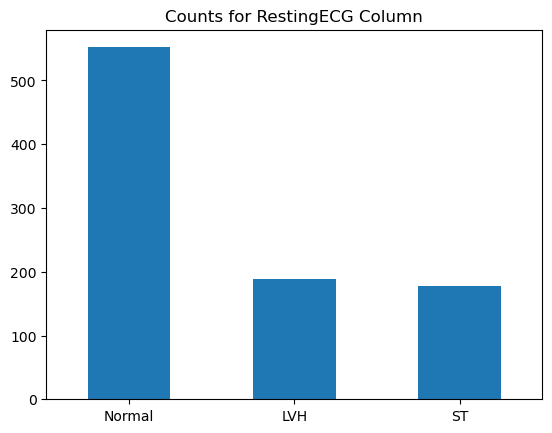

In [237]:
data['RestingECG'].value_counts().plot(kind = 'bar')
plt.title('Counts for RestingECG Column')
plt.xticks(rotation = 0)
plt.show()

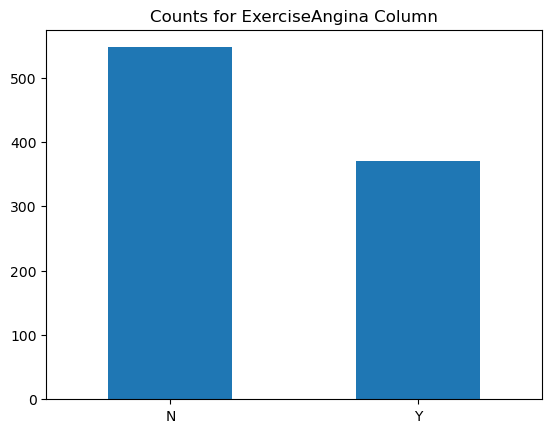

In [238]:
data['ExerciseAngina'].value_counts().plot(kind = 'bar')
plt.title('Counts for ExerciseAngina Column')
plt.xticks(rotation = 0)
plt.show()

A sort of even distribution of angina across the dataset

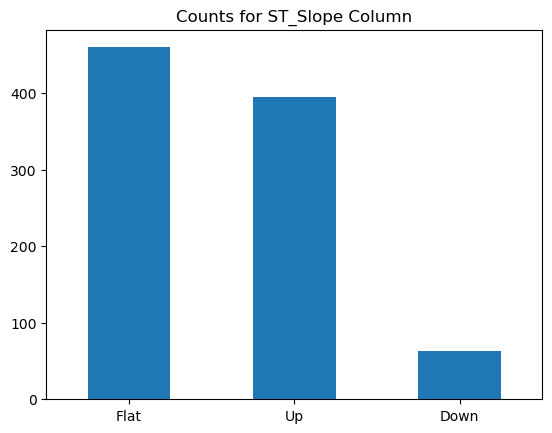

In [239]:
data['ST_Slope'].value_counts().plot(kind = 'bar')
plt.title('Counts for ST_Slope Column')
plt.xticks(rotation = 0)
plt.show()

Mostly Flat and Up ST_Slope peaks, Down isn't as present.

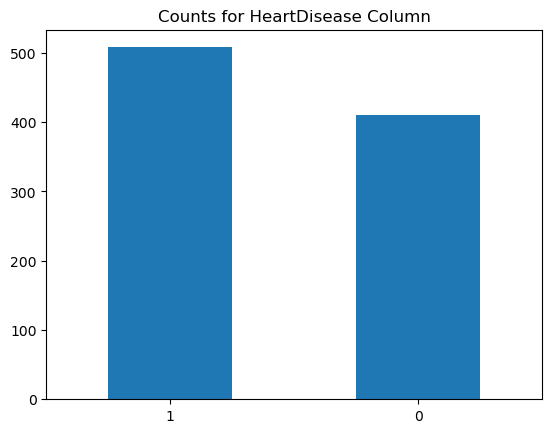

In [240]:
data['HeartDisease'].value_counts().plot(kind = 'bar')
plt.title('Counts for HeartDisease Column')
plt.xticks(rotation = 0)
plt.show()

Almost 50/50, maybe 60/40 for heart disease.

So what we've found is most of the patients are male, ASY is the most common type of chest pain, patient blood sugar is low for the most part, etc. 


## Group By Heart Disease Presence
Now we can group by the presence of heart disease to see if there's any relationship between the the feature and the target variable.

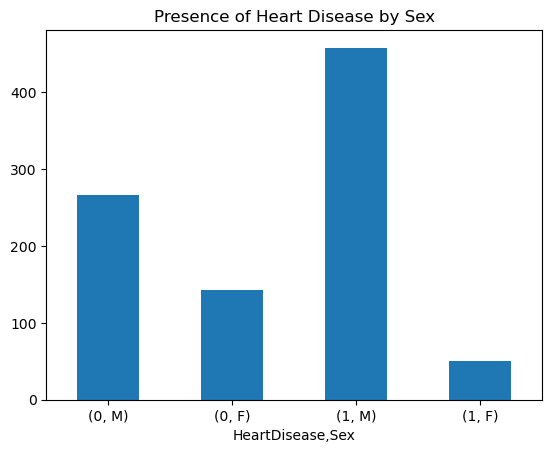

In [241]:
data['Sex'].groupby(data['HeartDisease']).value_counts().plot(kind = 'bar')
plt.title('Presence of Heart Disease by Sex')
plt.xticks(rotation = 0)
plt.show()

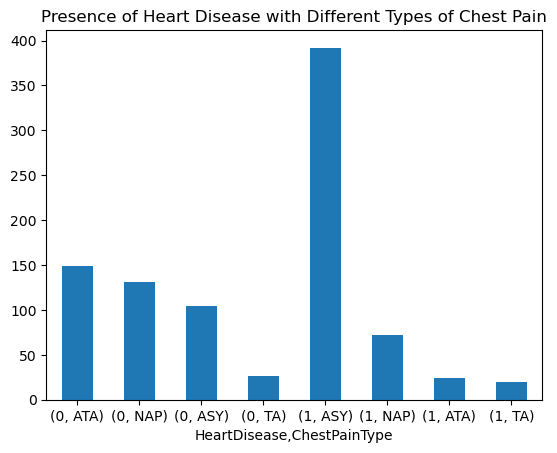

In [242]:
data['ChestPainType'].groupby(data['HeartDisease']).value_counts().plot(kind = 'bar')
plt.title('Presence of Heart Disease with Different Types of Chest Pain')
plt.xticks(rotation = 0)
plt.show()

Seems like presence of ASY chest pain highly correlates to a presence of heart disease

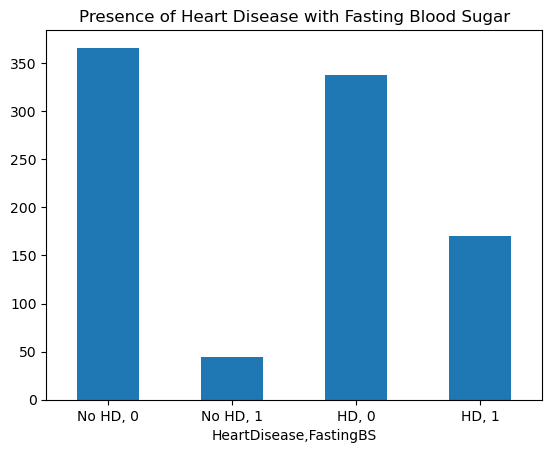

In [243]:
data['FastingBS'].groupby(data['HeartDisease']).value_counts().plot(kind = 'bar')
plt.title('Presence of Heart Disease with Fasting Blood Sugar')
x = [0,1,2,3]
plt.xticks(x, ['No HD, 0', 'No HD, 1', 'HD, 0', 'HD, 1'], rotation = 0)
plt.show()

This result is a bit confusing. On one hand people who don't have heart disease are more likely to have lower blood sugar. But those patients overall who do have low blood sugar are seemingly 50/50 on whether or not they have heart disease (according to this figure). 

But, we can see that out of the people who do have high blood sugar, there is a greater % that **do** have heart disease. 

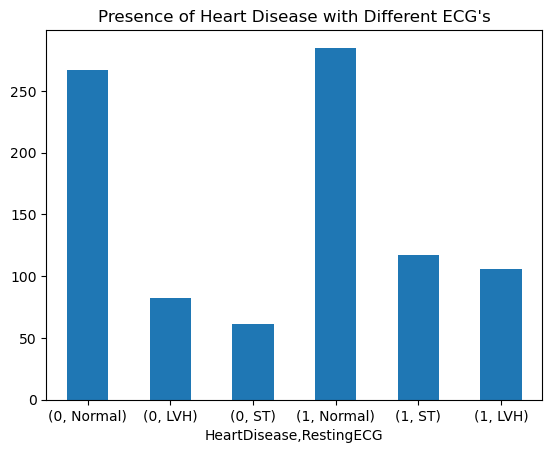

In [244]:
data['RestingECG'].groupby(data['HeartDisease']).value_counts().plot(kind = 'bar')
plt.title("Presence of Heart Disease with Different ECG's")
plt.xticks(rotation = 0)
plt.show()

Pretty similar to the last figure. The distribution of patients across ECG's look almost identical in patients with and without heart disease. 

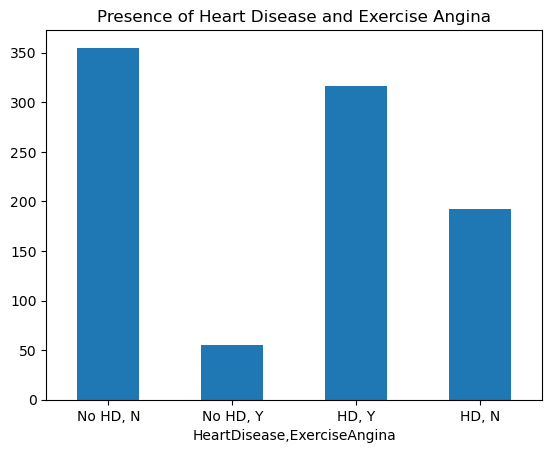

In [245]:
data['ExerciseAngina'].groupby(data['HeartDisease']).value_counts().plot(kind = 'bar')
plt.title('Presence of Heart Disease and Exercise Angina')
x = [0,1,2,3]
plt.xticks(x, ['No HD, N', 'No HD, Y', 'HD, Y', 'HD, N'], rotation = 0)
plt.show()

This shows that among people with exercise angina, about 6/7 of that population do have heart disease. 

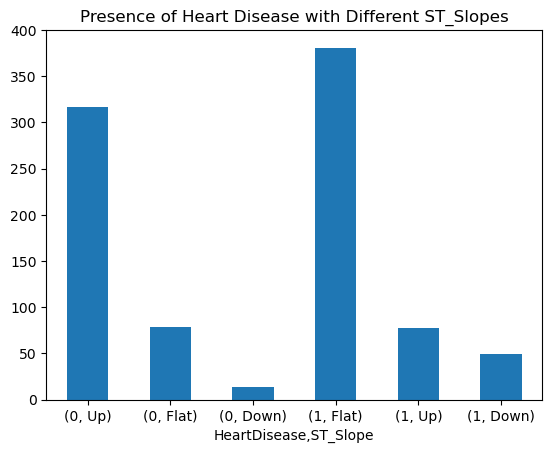

In [246]:
data['ST_Slope'].groupby(data['HeartDisease']).value_counts().plot(kind = 'bar')
plt.title("Presence of Heart Disease with Different ST_Slopes")
plt.xticks(rotation = 0)
plt.show()

It seems like once patients have heart disease, the % of people with Flat ST_Slopes rises tremendously, with a compensation/decrease in the Up ST_Slope category. 

## Ridding the dataset of nonsensical zero values

As we saw before, some columns, such as RestingBP or Cholesterol, have values of zero which don't make biological sense. 

Let's count them, if there are a significant amount of rows that have zero's, we can impute and replace them with the median value for the whole dataset. If there's only relatively few we could simply remove them.

In [247]:
print("0 value for RestingBP:", data['RestingBP'].value_counts()[0])
print("0 value for Cholesterol:", data['Cholesterol'].value_counts()[0])
print("0 % for Cholesterol:", data['Cholesterol'].value_counts(normalize = True)[0])

0 value for RestingBP: 1
0 value for Cholesterol: 172
0 % for Cholesterol: 0.18736383442265794


For RestingBP we can just remove that one row, but for cholesterol let's replace those values with the median.

In [248]:
import numpy as np
data['RestingBP'].replace(0, np.nan, inplace = True) #Replace 0 with null
data['RestingBP'].dropna(inplace = True) #Drop the null

In [249]:
data['Cholesterol'].mask(data['Cholesterol'] == 0, 
                         data['Cholesterol'].median(), inplace=True)
#Replaces zeroes with the median value

## Identifying Features

First we can start off with some features to build our model, and maybe build off of them later.

These are the key features as of now:
- Age
- Sex
- ChestPainType
- Cholesterol
- FastingBS
- ExerciseAngina
- ST_Slope

### Dummy Variables
We need to make these categorical values into binary so it's easier to read in for the model.

In [250]:
data = pd.get_dummies(data, columns = ['Sex', 'ChestPainType','ExerciseAngina',
                                       'ST_Slope', 'RestingECG'])

In [251]:
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,140.0,289,0,172,0.0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
1,49,160.0,180,0,156,1.0,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0
2,37,130.0,283,0,98,0.0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
3,48,138.0,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,1,0,0,1,0
4,54,150.0,195,0,122,0.0,0,0,1,0,...,1,0,1,0,0,0,1,0,1,0


In [252]:
correlations = data.corr()

<AxesSubplot:>

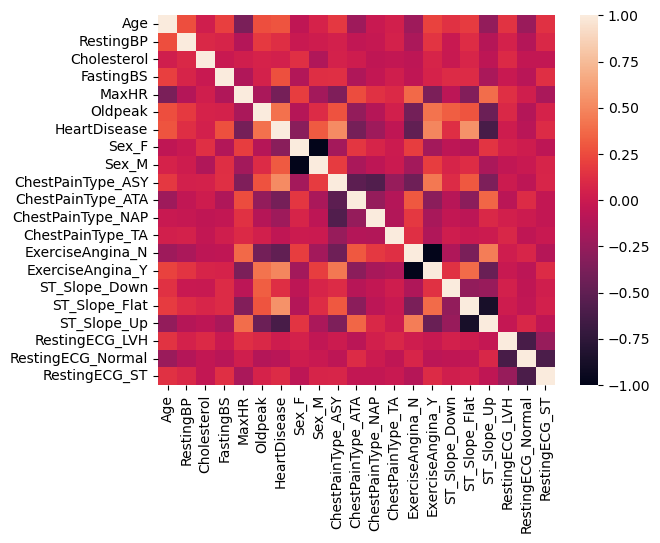

In [253]:
import seaborn as sns
sns.heatmap(correlations)

Heart Disease seems to be correlated to Oldpeak, Sex_M, ExerciseAngina_Y, ST_Slope_Flat, ChestPainType_ASY and negatively correlated to ST_Slope_Up

Surprisingly Cholesterol doesn't correlate to HeartDisease so we can ignore that for now.

## Training and Validation Sets

In [290]:
key_features = ['Oldpeak', 'Sex_M', 'ExerciseAngina_Y','ST_Slope_Flat',
                'ST_Slope_Up', 'ChestPainType_ASY']

In [295]:
X = data[key_features] #Isolate our key features
y = data['HeartDisease']

In [292]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2,
                                                  random_state = 0)

In [293]:
scaler = MinMaxScaler()
X_train_scal = scaler.fit_transform(X_train)
X_val_scal = scaler.transform(X_val) #Transforming data

In [294]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i) #Testing different neighbors
    knn.fit(X_train_scal, y_train)
    training_accuracy = knn.score(X_train_scal, y_train)
    validation_accuracy = knn.score(X_val_scal, y_val)
    print(f"Number of Neighors: {i} \nTraining Accuracy: {training_accuracy:.4f}\nModel Accuracy: {validation_accuracy:.4f}\n")

Number of Neighors: 1 
Training Accuracy: 0.8719
Model Accuracy: 0.8043

Number of Neighors: 2 
Training Accuracy: 0.8515
Model Accuracy: 0.7935

Number of Neighors: 3 
Training Accuracy: 0.8869
Model Accuracy: 0.8478

Number of Neighors: 4 
Training Accuracy: 0.8760
Model Accuracy: 0.8478

Number of Neighors: 5 
Training Accuracy: 0.8719
Model Accuracy: 0.8424

Number of Neighors: 6 
Training Accuracy: 0.8692
Model Accuracy: 0.8098

Number of Neighors: 7 
Training Accuracy: 0.8787
Model Accuracy: 0.8098

Number of Neighors: 8 
Training Accuracy: 0.8678
Model Accuracy: 0.8043

Number of Neighors: 9 
Training Accuracy: 0.8706
Model Accuracy: 0.8315



It seems like the number of neighbors should be 4, as it has the same accuracy as 3, but a lower training accuracy. This could mean that it's less likely to overfit.

You also may notice I didn't use Age in our key_features. My own bias led me to believe that Age had a high importance for heart disease, but it didn't have a large correlation. When I used Age as a predictor, the model had a 0.04 less accurate prediction, which is pretty large. 

## Messing with GridSearchCV

Now we can try perfecting the model with GridSearchCV, changing some parameters to see what exactly this data needs. 

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                  random_state = 5)

In [313]:
grid_params = {"n_neighbors": range(1, 20),
               "metric": ["minkowski", "manhattan"],
               "weights": ["uniform", "distance"],
               "p" : range(1,5)
              }
#Setting different parameters

In [318]:
X_train_scal = scaler.fit_transform(X_train)

In [319]:
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
knn_grid.fit(X_train_scal, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': range(1, 20), 'p': range(1, 5),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [324]:
accuracy = knn_grid.best_estimator_.score(X_train_scal, y_train)
print(f"Model Accuracy on training set: {accuracy*100:.2f}")

Model Accuracy on test set: 85.98


In [321]:
print(knn_grid.best_estimator_)
print(knn_grid.best_params_)

KNeighborsClassifier(n_neighbors=17, p=1)
{'metric': 'minkowski', 'n_neighbors': 17, 'p': 1, 'weights': 'uniform'}


When using our training data, GridSearchCV found that these were the best parameters:
- Metric: Minkowski
- N_Neighbors: 17
- p: 1
- weights: uniform

## Test Data 

Now with these parameters we can validate our test data and see how accurate the model is.

In [322]:
X_test_scal = scaler.transform(X_test)

In [323]:
accuracy = knn_grid.best_estimator_.score(X_test_scal, y_test)
print(f"Model Accuracy on test set: {accuracy*100:.2f}")

Model Accuracy on test set: 88.04


Somehow the accuracy is higher than performed on the training set. I've never seen this so I'm not sure what to believe. Maybe's it possible that the data is underfitted? Let's try reducing the test size ratio and seeing if that works at all. 

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                  random_state = 5)
X_train_scal = scaler.fit_transform(X_train)

In [326]:
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
knn_grid.fit(X_train_scal, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': range(1, 20), 'p': range(1, 5),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [327]:
accuracy = knn_grid.best_estimator_.score(X_train_scal, y_train)
print(f"Model Accuracy on training set: {accuracy*100:.2f}")

Model Accuracy on training set: 84.60


In [328]:
X_test_scal = scaler.transform(X_test)

In [329]:
accuracy = knn_grid.best_estimator_.score(X_test_scal, y_test)
print(f"Model Accuracy on test set: {accuracy*100:.2f}")

Model Accuracy on test set: 86.41


Okay that didn't do anything. I thought maybe a larger training sample would aid in the fitting and reduce the number but it seems to have stayed the same. 

# Conclusion

In this project we learned how to visualize features that correlate to higher chance of heart disease and construct a model to predict whether or not a patient does have heart disease based on their current health. 

We ended up with an accuracy of around 85%, which is not bad, but the model seemed to be underfitting which could lead to problems with validity and accurate predictions. 